In [1]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [2]:
from pyomo.environ import*
import pandas as pd
import numpy as np

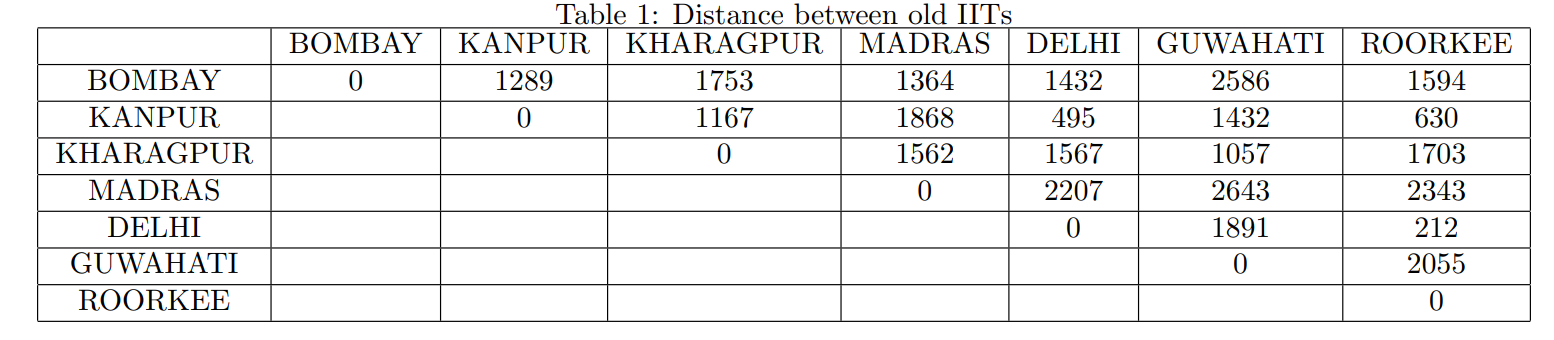

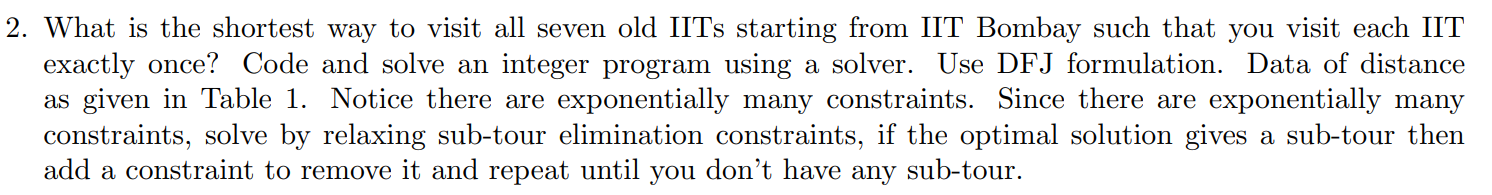

In [3]:
distances = np.array([
    [0, 1289, 1753, 1364, 1432, 2586, 1594],
    [1289, 0, 1167, 1868, 495, 1432, 630],
    [1753, 1167, 0, 1562, 1567, 1057, 1703],
    [1364, 1868, 1562, 0, 2207, 2643, 2343],
    [1432, 495, 1567, 2207, 0, 1891, 212],
    [2586, 1432, 1057, 2643, 1891, 0, 2055],
    [1594, 630, 1703, 2343, 212, 2055, 0]
])


In [15]:
from pyomo.environ import *

# Define distance matrix
distances = [
    [0, 1289, 1753, 1364, 1432, 2586, 1594],
    [1289, 0, 1167, 1868, 495, 1432, 630],
    [1753, 1167, 0, 1562, 1567, 1057, 1703],
    [1364, 1868, 1562, 0, 2207, 2643, 2343],
    [1432, 495, 1567, 2207, 0, 1891, 212],
    [2586, 1432, 1057, 2643, 1891, 0, 2055],
    [1594, 630, 1703, 2343, 212, 2055, 0]
]

# Number of cities
num_cities = len(distances)

# Create a concrete model
model = ConcreteModel()

# Define set of cities
model.CITIES = RangeSet(1, num_cities)

# Define binary decision variables
model.x = Var(model.CITIES, model.CITIES, within=Binary)

# Define objective function
model.total_distance = Objective(expr=sum(distances[i-1][j-1] * model.x[i, j] for i in model.CITIES for j in model.CITIES if i != j), sense=minimize)

# Define degree constraints
def outgoing_constraint_rule(model, i):
    return sum(model.x[i, j] for j in model.CITIES if i != j) == 1
model.outgoing_constraint = Constraint(model.CITIES, rule=outgoing_constraint_rule)

def incoming_constraint_rule(model, j):
    return sum(model.x[i, j] for i in model.CITIES if i != j) == 1
model.incoming_constraint = Constraint(model.CITIES, rule=incoming_constraint_rule)

# Define subtour elimination constraints
def subtour_elimination_rule(model, i, j):
    if i != j:
        return model.x[i, j] + model.x[j, i] <= 1
    else:
        return Constraint.Skip
model.subtour_elimination_constraint = Constraint(model.CITIES, model.CITIES, rule=subtour_elimination_rule)
# Solve the model
solver = SolverFactory('glpk')
results = solver.solve(model)

# Extract optimal tour
optimal_tour = [i for i in model.CITIES if sum(value(model.x[i, j]) for j in model.CITIES if i != j) == 1]

# Sort the optimal tour based on the order of cities visited
optimal_tour.sort()

# Calculate total distance
total_distance = sum(distances[i-1][j-1] for i in optimal_tour for j in optimal_tour if i != j)


print("Optimal tour:", optimal_tour)
print("Total distance:", total_distance)



Optimal tour: [1, 2, 3, 4, 5, 6, 7]
Total distance: 62245
